In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [6]:
# loading the data from csv file to pandas dataframe
calories = pd.read_csv('./calories.csv')
# calories.head()

exercise = pd.read_csv('./exercise.csv')
# exercise.head()

# combining the data 
calories_data = pd.concat([exercise, calories['Calories']], axis=1)
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [11]:
# checking the number of rows and columns
# calories_data.shape

# getting some info about the data
calories_data.info()

# checking for missing values
calories_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [12]:
# Data Analysis
calories_data.describe()


,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


<Axes: xlabel='count', ylabel='Gender'>

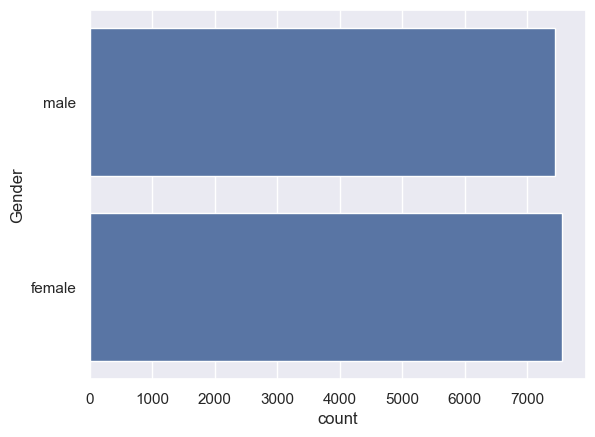

In [15]:
# Data visualization
sns.set_theme()
sns.countplot(calories_data['Gender']) # useful mostly for categorical cols


<Axes: xlabel='Age', ylabel='Count'>

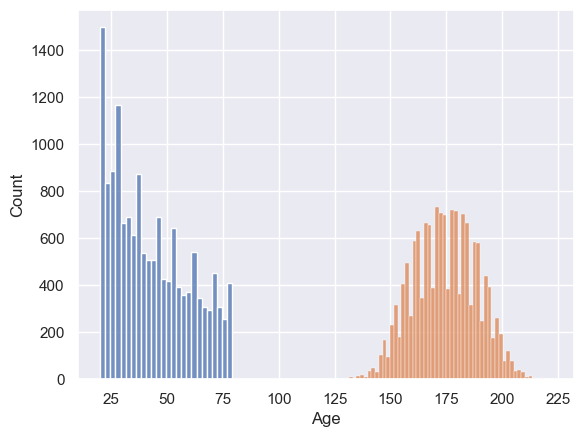

In [17]:
# finding the distribution of age column
sns.histplot(calories_data['Age'])
sns.histplot(calories_data['Height'])

<Axes: >

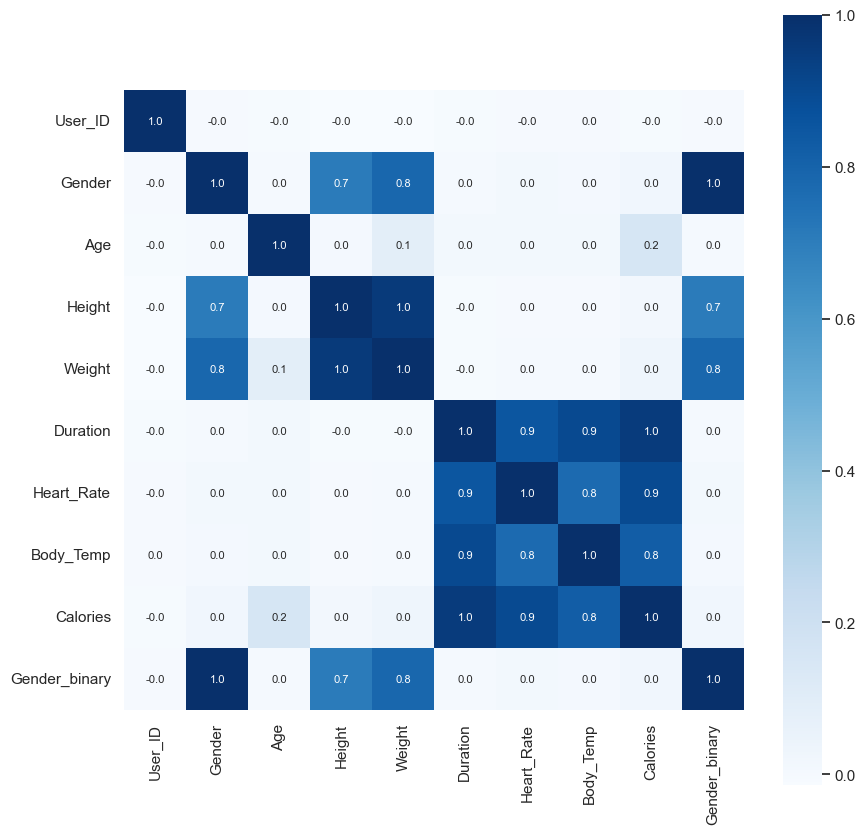

In [24]:
from sklearn import preprocessing   
le = preprocessing.LabelEncoder()

le.fit(list(calories_data['Gender']))
calories_data['Gender'] = calories_data['Gender'].apply(lambda x: le.transform([x])[0])


# INSTEAD OF ABOVE PREPROCESSING --> ANOTHER METHOD IS : 
# calories_data.replace({'Gender' : {'male' : 1, 'female' : 0}}, inplace=True)

# calories_data[['Gender']]
# calories.drop('Gender')

correlation = calories_data.corr()
# constructing a heatmap to understand correlation

plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size' : 8}, cmap='Blues')

In [26]:
x = calories_data.drop(columns=['User_ID', 'Calories'], axis=1)
y = calories_data['Calories']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = XGBRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


In [27]:
# Mean absolute error
mae = metrics.mean_absolute_error(y_test, y_pred)
print(mae)

1.4981198125282924
